# Import Modules

In [53]:
# Data handling
import os
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Algs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsRegressor

# Splitting, Processing, Scaling, Metrics, and More!
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# Static Variables

In [10]:
# Paths
base_path = os.getcwd()
train_data = os.path.join(base_path, 'train.csv')
test_data = os.path.join(base_path, 'test.csv')

# Load Data
train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)

In [11]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
# Drop columns that won't be useful
train_df.drop(columns=['PassengerId','Name','Ticket','Cabin'], inplace=True)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


# Exploratory Data Analysis / Cleaning

In [13]:
"""
We want to replace Sex values and Embarked values with numbers.
"""
new_sex = train_df['Sex'].replace({'male':0, 'female':1}) #males are 0, females are 1
train_df['Sex'] = new_sex
new_embarked = train_df['Embarked'].replace({'S':0, 'C':1, 'Q':2}) #Pretty self explanatory
train_df['Embarked'] = new_embarked
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0
887,1,1,1,19.0,0,0,30.0000,0.0
888,0,3,1,NaN,1,2,23.4500,0.0
889,1,1,0,26.0,0,0,30.0000,1.0


In [14]:
train_df.describe()
# We will have to clean the Age column (over 100 nulls).  
#Embarked isn't missing enough to cause concern; however, we'll need to fill those in before we can move on.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.362205
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.636157
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [15]:
train_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.108669
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.043835
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.118593
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,0.012186
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,-0.060606
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.079320
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.063462
Embarked,0.108669,0.043835,0.118593,0.012186,-0.060606,-0.079320,0.063462,1.000000


In [16]:
# It looks like Age has the most correlation 
#(and, if you look at the two null values, that's the only difference between the two)
train_df[train_df['Embarked'].isnull()]
# Lets find the median age for each Embarked value and fill these with whichever is closest

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,1,38.0,0,0,80.0,NaN
829,1,1,1,62.0,0,0,80.0,NaN


In [17]:
train_df.groupby('Embarked').median()['Age']
# Looks like they're both being assigned the value of 1.

Embarked
0.0    28.0
1.0    29.0
2.0    27.0
Name: Age, dtype: float64

In [18]:
train_df['Embarked'].fillna(1, inplace=True)

In [19]:
# We'll use linear regression to find the most likely age
train_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.111203
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.040138
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.121266
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,0.017651
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,-0.061591
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.080277
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.065492
Embarked,0.111203,0.040138,0.121266,0.017651,-0.061591,-0.080277,0.065492,1.000000


In [20]:
# Set up two DataFrames: One for null age values (to train) and one without (to predict)
no_age_nan = train_df[train_df['Age'].notnull()]
only_age_nan = train_df[train_df['Age'].isnull()]

# Grab from df without null age values to train the alg
X_array = np.array(no_age_nan[['Pclass','Sex','SibSp','Parch','Fare','Embarked']])
y_array = np.array(no_age_nan['Age'])

In [21]:
# Train the alg
knr = KNeighborsRegressor(n_neighbors=5) 
knr.fit(X=X_array, y=y_array)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [22]:
knr.score(X_array,y_array)

0.3739727538572384

In [23]:
predicted_age = knr.predict(only_age_nan[['Pclass','Sex','SibSp','Parch','Fare','Embarked']])
predicted_age

array([47.2  , 29.4  , 23.   , 32.5  , 21.7  , 29.8  , 21.584, 21.1  ,
       24.8  , 27.8  , 30.2  , 29.   , 21.1  , 26.4  , 49.4  , 38.9  ,
       16.2  , 29.8  , 30.2  , 21.1  , 30.2  , 30.2  , 29.8  , 34.2  ,
       32.6  , 30.2  , 47.2  , 17.6  , 20.4  , 34.8  , 26.8  , 37.   ,
       33.8  , 44.8  , 19.2  , 37.   , 32.   , 45.4  , 22.1  , 47.2  ,
       21.1  , 37.   , 47.2  , 29.8  , 21.4  , 25.8  , 19.9  , 22.1  ,
       34.8  , 39.2  , 47.2  , 21.1  , 48.6  , 21.1  , 33.8  , 42.6  ,
       38.9  , 48.6  , 21.1  , 29.6  , 32.6  , 30.2  , 28.   , 37.   ,
       23.2  , 40.4  , 29.8  , 27.2  , 49.4  , 32.5  , 21.7  , 21.7  ,
       29.   , 22.   , 21.1  , 36.4  , 29.8  , 42.1  , 21.4  , 29.8  ,
       40.1  , 33.8  , 27.   , 27.8  , 34.8  , 47.2  , 27.2  , 21.6  ,
       27.   , 30.2  , 41.8  , 47.2  , 30.2  , 33.8  , 42.1  , 34.8  ,
       44.4  , 33.8  , 21.4  , 27.   , 22.4  , 30.3  , 21.1  , 52.6  ,
       30.2  , 32.2  , 32.5  , 24.8  , 30.8  , 24.8  , 14.   , 40.   ,
      

In [24]:
# Now lets fill it in
train_df.loc[train_df['Age'].isnull(),'Age'] = predicted_age
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0
887,1,1,1,19.0,0,0,30.0000,0.0
888,0,3,1,26.8,1,2,23.4500,0.0
889,1,1,0,26.0,0,0,30.0000,1.0


In [25]:
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,30.137192,0.523008,0.381594,32.204208,0.363636
std,0.486592,0.836071,0.477990,13.603728,1.102743,0.806057,49.693429,0.636159
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.100000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,29.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [26]:
# Save file for tableau use
train_df.to_csv('Datasets\\new_train.csv')
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0
887,1,1,1,19.0,0,0,30.0000,0.0
888,0,3,1,26.8,1,2,23.4500,0.0
889,1,1,0,26.0,0,0,30.0000,1.0


# Prep Data for ML

In [33]:
# Separate Features from Target
X = train_df[['Pclass','Sex','Age','SibSp','Fare','Embarked']]
y = train_df['Survived']

In [47]:
# Scale the data
scale = StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X)

In [37]:
# Apply PCA to dataset
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

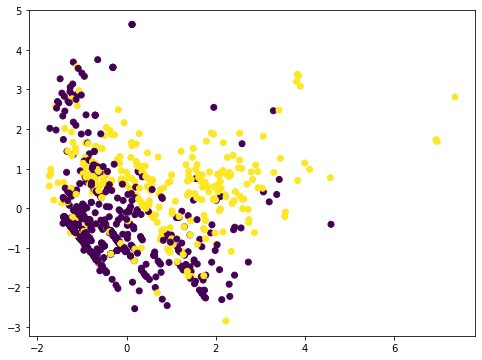

In [41]:
# Quick visualization to see what new components look like, colored by target
plt.figure(figsize=(8,6))
plt.scatter(x=X_pca[:,0], y=X_pca[:,1],c=y)

In [49]:
# Separate into test and train arrays
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.33)

# Try out some ML algs

In [50]:
svc_grid = GridSearchCV(SVC(), {'C':np.arange(0.01,10,0.01), 'gamma':np.arange(0.01,10,0.01)}, n_jobs=-1, verbose=1)
svc_grid.fit(X_train, y_train)

In [ ]:
print("SVC Best Params: ",svc_grid.best_params_)
print("SVC Best Score: ", svc_grid.best_score_)

In [51]:
lsvc_grid = GridSearchCV(LinearSVC(), {'penalty':['l1','l2'], 'C':np.arange(0.01, 10, 0.01)}, n_jobs=-1, verbose=1)
lsvc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1998 candidates, totalling 9990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 904 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 9924 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 9990 out of 9990 | elapsed:  1.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13,...
       9.47, 9.48, 9.49, 9.5 , 9.51, 9.52, 9.53, 9.54, 9.55, 9.56, 9.57,
       9.58, 9.59, 9.6 , 9.61, 9.62, 9.63, 9.64, 9.65, 9.66, 9.67, 9.68,
       9.69, 9.7 , 9.71, 9.72, 9.73, 9.74, 9.75, 9.76, 9.77, 9.78, 9.79,
       9.8 , 9.81, 9.82, 9.83, 9.84, 9.85, 9.86, 9.87, 9.88, 9.89, 9.9 ,
       9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_j

In [57]:
print("Linear SVC Best Params: ",lsvc_grid.best_params_)
print("Linear SVC Best Score: ", lsvc_grid.best_score_)

Linear SVC Best Params:  {'C': 0.02, 'penalty': 'l2'}
Linear SVC Best Score:  0.719859943977591


In [60]:
# Get confusion matrix and classification report
lsvc_predictions = lsvc_grid.predict(X_test)
print("Linear SVC Confusion Matrix:\n", confusion_matrix(y_test, lsvc_predictions))
print("\nLinear SVC Classification Report:\n", classification_report(y_test, lsvc_predictions))

Linear SVC Confusion Matrix:
 [[158  27]
 [ 57  53]]

Linear SVC Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.85      0.79       185
           1       0.66      0.48      0.56       110

    accuracy                           0.72       295
   macro avg       0.70      0.67      0.67       295
weighted avg       0.71      0.72      0.70       295



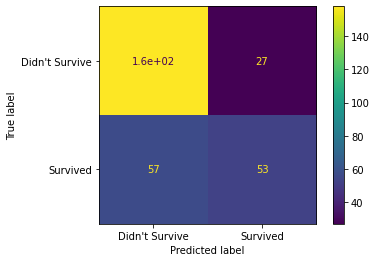

In [74]:
ConfusionMatrixDisplay(confusion_matrix(y_test, lsvc_predictions),["Didn't Survive","Survived"]).plot()